<a href="https://colab.research.google.com/github/projectmakerrajkumar/News-Veracity-Analysis-Using-Machine-Learning-On-Social-Media-Data/blob/main/FreshMart_Retail_Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Configure visualizations
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [12]:
# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Grocery_Inventory_and_Sales_Dataset.xlsx')

In [13]:
# Dataset info
df.info()

# Missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_ID               990 non-null    object
 1   Product_Name             990 non-null    object
 2   Catagory                 989 non-null    object
 3   Supplier_ID              990 non-null    object
 4   Supplier_Name            990 non-null    object
 5   Stock_Quantity           990 non-null    int64 
 6   Reorder_Level            990 non-null    int64 
 7   Reorder_Quantity         990 non-null    int64 
 8   Unit_Price               990 non-null    object
 9   Date_Received            990 non-null    object
 10  Last_Order_Date          990 non-null    object
 11  Expiration_Date          990 non-null    object
 12  Warehouse_Location       990 non-null    object
 13  Sales_Volume             990 non-null    int64 
 14  Inventory_Turnover_Rate  990 non-null    i

/tmp/ipython-input-14-1764717249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='Set2')


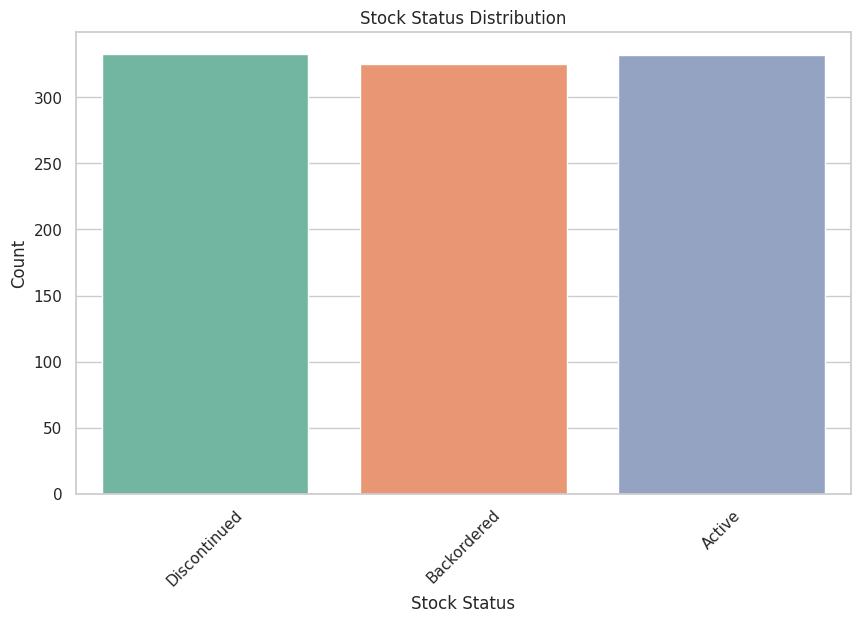

In [14]:
# Bar plot of stock status
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Stock Status Distribution')
plt.xlabel('Stock Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-15-2624839043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Catagory', data=df, palette='cool')


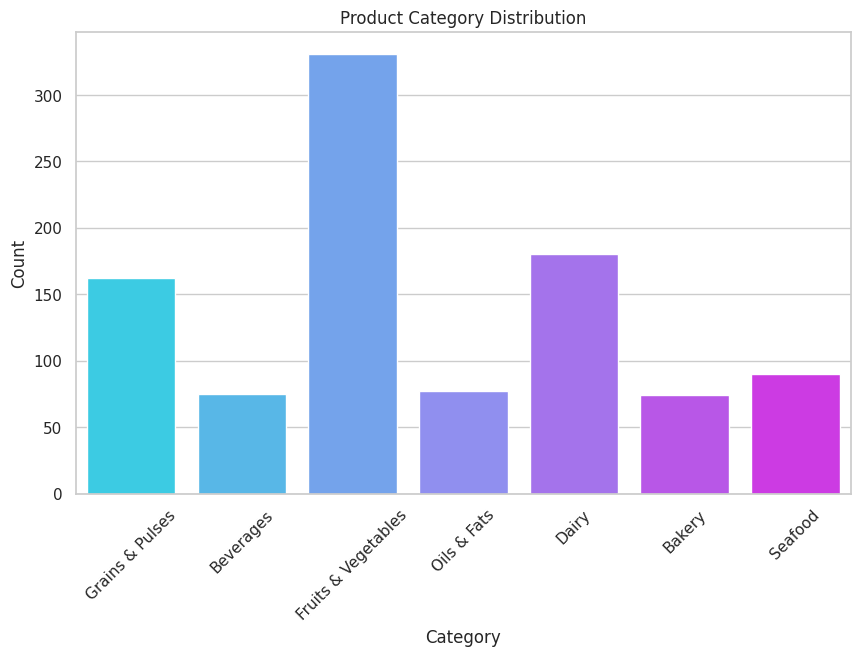

In [15]:
# Bar plot of product categories
sns.countplot(x='Catagory', data=df, palette='cool')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Drop missing rows
df.dropna(inplace=True)

# Encode categorical data
le_cat = LabelEncoder()
le_status = LabelEncoder()

df['Catagory'] = le_cat.fit_transform(df['Catagory'])
df['Status'] = le_status.fit_transform(df['Status'])

# Save encoders
joblib.dump(le_cat, 'category_encoder.pkl')
joblib.dump(le_status, 'status_encoder.pkl')

print(" Encoding complete")

 Encoding complete


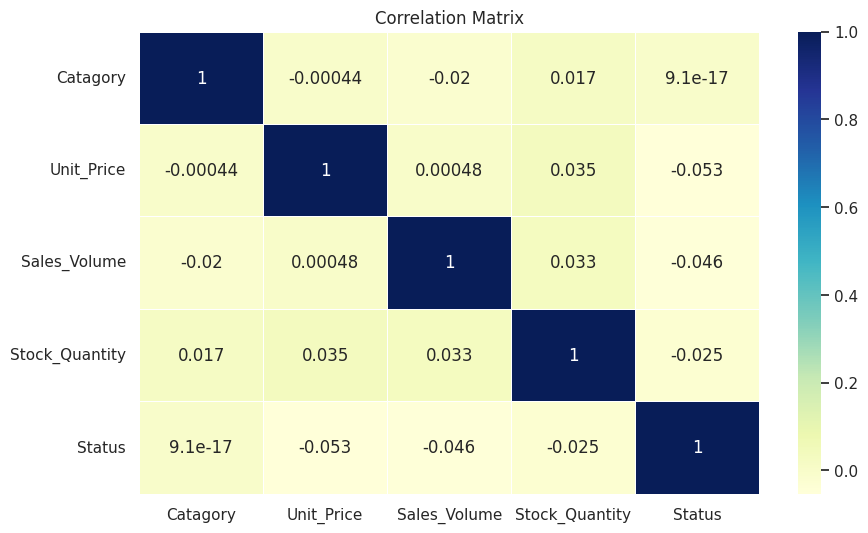

In [17]:
# Convert 'Unit_Price' to numeric
df['Unit_Price'] = df['Unit_Price'].replace({'\$': ''}, regex=True).astype(float)

# Correlation heatmap
corr = df[['Catagory', 'Unit_Price', 'Sales_Volume', 'Stock_Quantity', 'Status']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [19]:
# Define input and target
features = ['Catagory', 'Unit_Price', 'Sales_Volume', 'Stock_Quantity']
X = df[features]
y = df['Status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(" Model training complete")


 Model training complete


 Accuracy: 0.3787878787878788

 Classification Report:
               precision    recall  f1-score   support

      Active       0.47      0.40      0.43        73
 Backordered       0.33      0.37      0.35        59
Discontinued       0.35      0.36      0.36        66

    accuracy                           0.38       198
   macro avg       0.38      0.38      0.38       198
weighted avg       0.39      0.38      0.38       198



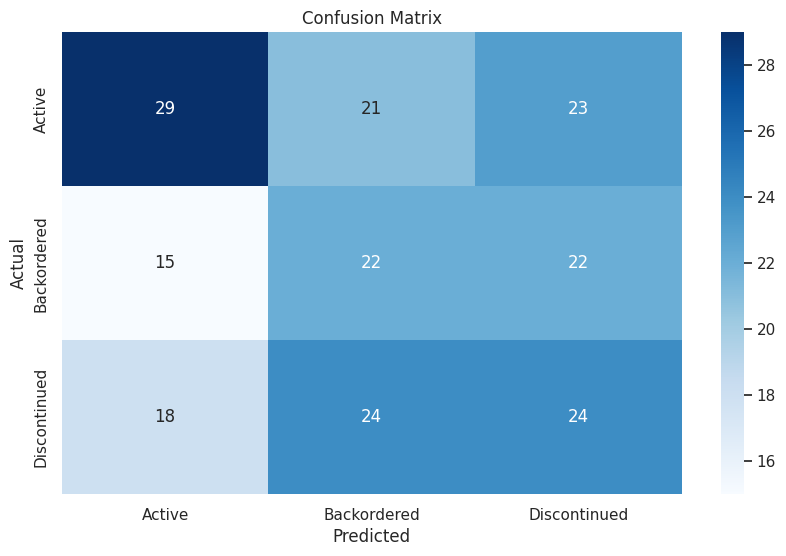

In [21]:
# Predict
y_pred = model.predict(X_test)

# Print accuracy and report
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=le_status.classes_))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_status.classes_, yticklabels=le_status.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


/tmp/ipython-input-22-1463359463.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette='viridis')


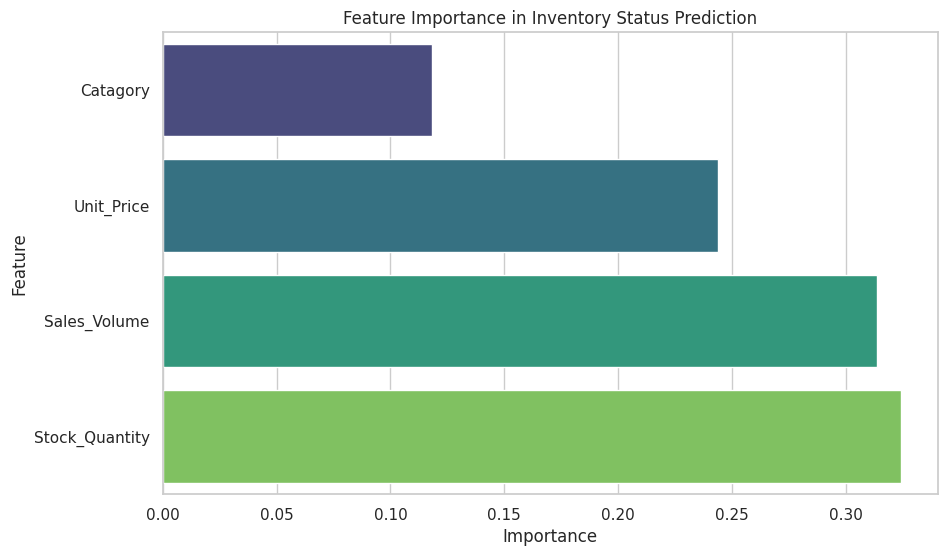

In [22]:
# Feature importance
importance = model.feature_importances_
feature_names = X.columns

sns.barplot(x=importance, y=feature_names, palette='viridis')
plt.title('Feature Importance in Inventory Status Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [23]:
# Example: [Category, Price, Quantity_Sold, Current_Stock]
sample_item = [[1, 10.5, 60, 20]]
pred = model.predict(sample_item)
label = le_status.inverse_transform(pred)

print(" Predicted Stock Status:", label[0])


 Predicted Stock Status: Active


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
joblib.dump(model, 'freshmart_inventory_model.pkl')
print(" Model saved successfully")


 Model saved successfully
